<div align="center">
  <h2>Titanic Spaceship</h2>
  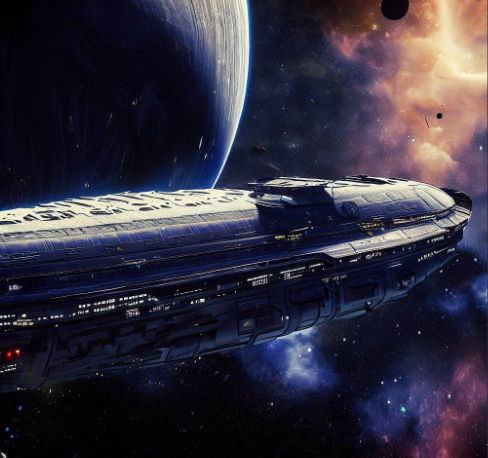
  <h4>Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery.</h4>
<h4>We've received a transmission from four lightyears away and things aren't looking good.</h4>

<h4>The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.</h4>

<h4>While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as it's namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!</h4>

<h4>To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.</h4>

<h4>Help save them and change history!</h4>

</div>

### Data description

**File and Data Field Descriptions** <br>
train.csv - Personal records for about two-thirds (8700) of the passengers, to be used as training data.<br><br><br>
`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.<br><br>
`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.<br><br>
`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.<br><br>
`Cabin`- The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.<br><br>
`Destination` - The planet the passenger will be debarking to.<br><br>
`Age` - The age of the passenger.<br><br>
`VIP` - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.<br><br>
`Name` - The first and last names of the passenger.<br><br>
`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.<br><br>
`test.csv` - Personal records for the remaining one-third (4300) of the passengers, to be used as test   data. Your task is to predict the value of Transported for the passengers in this set.<br><br>
`sample_submission.csv` - A submission file in the correct format.<br><br>
`PassengerId` - Id for each passenger in the test set.<br><br>
`Transported` - The target. For each passenger, predict either True or False.<br><br>

In [57]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
%matplotlib inline

In [58]:
train_data = pd.read_csv('/Users/Rocky/jupyter_home_folder/kaggle/spaceship_titanic/train.csv')
test_data = pd.read_csv('/Users/Rocky/jupyter_home_folder/kaggle/spaceship_titanic/test.csv')
submission_data = pd.read_csv('/Users/Rocky/jupyter_home_folder/kaggle/spaceship_titanic/sample_submission.csv')

In [59]:
train_data.shape, test_data.shape

((8693, 14), (4277, 13))

In [61]:
PassengerId = test_data['PassengerId']

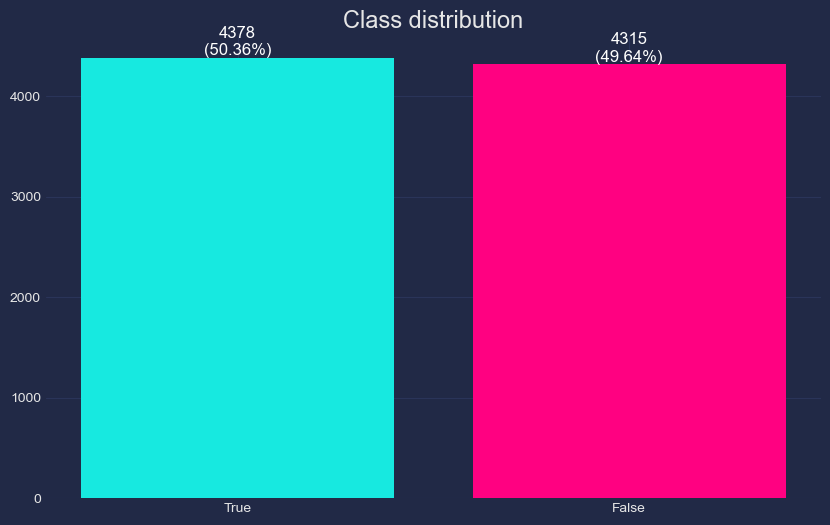

<Figure size 640x480 with 0 Axes>

In [4]:
class_balance = train_data.Transported.value_counts()
total_samples = class_balance.sum()

cyberpunk_colors = ['#17E9E0', '#FF0181']
with plt.style.context('cyberpunk'):
    fig, ax = plt.subplots(figsize=(10, 6))
    group = ['True', 'False']
    bars = plt.bar(group, class_balance, color=cyberpunk_colors)
    plt.title("Class distribution", fontsize=17)
    
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval}\n({yval/total_samples:.2%})', ha='center', va='bottom', color='white', fontsize=12)
    
    plt.show()
    plt.tight_layout()

In [5]:
y_true = train_data['Transported']
train_data = train_data.drop(['Cabin', 'Destination', 'PassengerId', 'Transported'], axis=1)
test_data = test_data.drop(['Cabin', 'Destination', 'PassengerId'], axis=1)

In [6]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train_data.dtypes

HomePlanet       object
CryoSleep        object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [8]:
train_data.isna().sum()

HomePlanet      201
CryoSleep       217
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [9]:
test_data.isna().sum()

HomePlanet       87
CryoSleep        93
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
train_numeric_columns = train_data.select_dtypes(include='float64').columns
test_numeric_columns = test_data.select_dtypes(include='float64').columns

In [11]:
train_numeric_columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [12]:
train_categorial_columns = train_data.select_dtypes(exclude='float64').columns

In [13]:
for num_col in train_numeric_columns:
    train_data[num_col] = train_data[num_col].fillna(train_data[num_col].mean())
    test_data[num_col] = test_data[num_col].fillna(test_data[num_col].mean())
    

for cat_col in train_categorial_columns:
    popular_category = train_data[cat_col].value_counts(0).idxmax()
    train_data[cat_col] = train_data[cat_col].fillna(popular_category)
    test_data[cat_col] = test_data[cat_col].fillna(popular_category)

In [14]:
train_data.isna().sum()

HomePlanet      0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [15]:
test_data.isna().sum()

HomePlanet      0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [16]:
for all_cols in train_data.columns:
    print(f"Columns {all_cols} contain amount unique meaning: {train_data[all_cols].nunique()}")

Columns HomePlanet contain amount unique meaning: 3
Columns CryoSleep contain amount unique meaning: 2
Columns Age contain amount unique meaning: 81
Columns VIP contain amount unique meaning: 2
Columns RoomService contain amount unique meaning: 1274
Columns FoodCourt contain amount unique meaning: 1508
Columns ShoppingMall contain amount unique meaning: 1116
Columns Spa contain amount unique meaning: 1328
Columns VRDeck contain amount unique meaning: 1307
Columns Name contain amount unique meaning: 8473


In [17]:
train_numeric_columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [18]:
train_categirial_df = train_data.drop(columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)
test_categirial_df = test_data.drop(columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

In [19]:
train_columns_for_ohe = [x for x in train_categirial_df if train_categirial_df[x].nunique() < 4]
train_columns_for_mte = [x for x in train_categirial_df if train_categirial_df[x].nunique() > 4]

In [20]:
test_columns_for_ohe = [j for j in test_categirial_df if test_categirial_df[j].nunique() < 4]
test_columns_for_mte = [j for j in test_categirial_df if test_categirial_df[j].nunique() > 4]

In [21]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

In [22]:
train_ohe = OneHotEncoder(drop='first', sparse=False)
train_ohe_encoded = train_ohe.fit_transform(train_categirial_df[train_columns_for_ohe])
train_ohe_df = pd.DataFrame(train_ohe_encoded, columns=train_ohe.get_feature_names(train_columns_for_ohe))


test_ohe = OneHotEncoder(drop='first', sparse=False)
test_ohe_encoded = test_ohe.fit_transform(test_categirial_df[test_columns_for_ohe])
test_ohe_df = pd.DataFrame(test_ohe_encoded, columns=test_ohe.get_feature_names(test_columns_for_ohe))

C:\Users\Rocky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Rocky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Concationation after encoding

In [23]:
X = pd.concat([train_data[train_numeric_columns], train_ohe_df], axis=1)
X_test_data = pd.concat([test_data[test_numeric_columns], test_ohe_df], axis=1)

In [24]:
y = pd.get_dummies(y_true, drop_first=True)

In [25]:
X_test_data.isna().sum()

Age                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
HomePlanet_Europa    0
HomePlanet_Mars      0
CryoSleep_True       0
VIP_True             0
dtype: int64

In [26]:
X.isna().sum()

Age                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
HomePlanet_Europa    0
HomePlanet_Mars      0
CryoSleep_True       0
VIP_True             0
dtype: int64

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif, f_oneway, chi2

k_best_selector = SelectKBest(score_func=f_classif, k='all')

X_train_selected = k_best_selector.fit_transform(X, y)


selected_feature_indices = k_best_selector.get_support(indices=True)
feature_scores = k_best_selector.scores_[selected_feature_indices]


selected_features_with_scores = [(feature_name, score) 
                                 for feature_name, score in zip(X.columns[selected_feature_indices], feature_scores)]

print("Selected feature and score:")
for feature_name, score in selected_features_with_scores:
    print(f"Feature: {feature_name}, Score: {round(score, 2)}")


Selected feature and score:
Feature: Age, Score: 48.18
Feature: RoomService, Score: 540.87
Feature: FoodCourt, Score: 18.49
Feature: ShoppingMall, Score: 0.87
Feature: Spa, Score: 436.95
Feature: VRDeck, Score: 380.58
Feature: HomePlanet_Europa, Score: 280.81
Feature: HomePlanet_Mars, Score: 3.32
Feature: CryoSleep_True, Score: 2334.3
Feature: VIP_True, Score: 12.08


C:\Users\Rocky\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1) Score with f_classif function
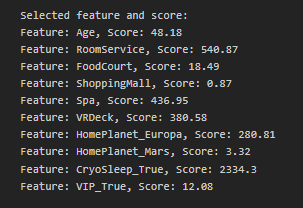
2) Score with f_oneway function
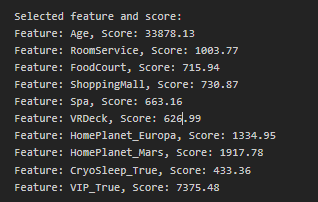
3) Score with chi2 function
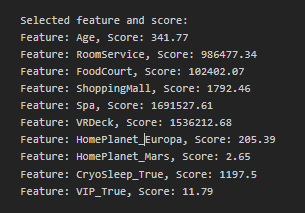

In [28]:
X_corr = pd.concat([X, y], axis=1)

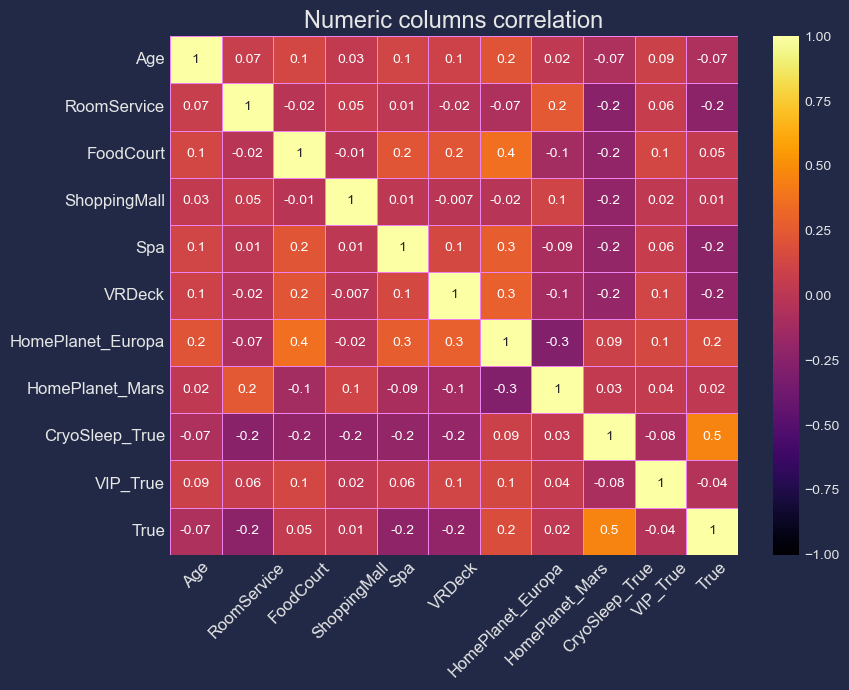

In [29]:
with plt.style.context('cyberpunk'):   
    fig = plt.figure()
    fig.set_size_inches(9, 7)

    hm = sns.heatmap(X_corr.corr(),
                     annot=True, 
                     fmt='.1g',
                     xticklabels=X_corr.corr().columns,
                     yticklabels=X_corr.corr().columns,
                     cmap='inferno',
                     vmin=-1,
                     vmax=1, 
                     center=0,
                     linewidths=0.7,
                     linecolor='#EE82EE')

    hm.set_facecolor=('#DEB887')
    hm.set_title('Numeric columns correlation', fontsize=17)
    hm.tick_params(axis='both', labelsize=12, color='black')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [30]:
def get_redundant_pairs(X_corr):
    pairs_to_drop = set()
    cols = X_corr.columns
    for i in range(0, X_corr.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = X_corr.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(X_corr)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(X_corr, 11))

Top Absolute Correlations
CryoSleep_True     True                 0.460132
FoodCourt          HomePlanet_Europa    0.365500
HomePlanet_Europa  HomePlanet_Mars      0.287022
VRDeck             HomePlanet_Europa    0.282118
Spa                HomePlanet_Europa    0.266323
RoomService        HomePlanet_Mars      0.245451
                   CryoSleep_True       0.243986
                   True                 0.242048
FoodCourt          VRDeck               0.224275
                   Spa                  0.220587
Spa                True                 0.218791
dtype: float64


### Modeling

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
y = np.ravel(y)

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [34]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6519, 10), (2174, 10), (6519,), (2174,))

###  RandomForest

In [40]:
%%time
rf_pipeline = Pipeline([('scaler', StandardScaler()),
                       ('rf', RandomForestClassifier(verbose=False))])

params= {
    'rf__n_estimators': [45, 55, 65],
    'rf__criterion': ["gini", "entropy"],
    "rf__max_depth": [3, 4, 5, 6, 7, 8],
    "rf__min_samples_split": [6, 7, 8, 9],
    "rf__min_samples_leaf": [1, 2, 3]
}

rf_grid = GridSearchCV(rf_pipeline, param_grid=params, cv=5)

random_forest = rf_grid.fit(X_train, y_train)

random_forest_predict_train = rf_grid.predict(X_train)
random_forest_predict_val = rf_grid.predict(X_val)

print(f"Accuracy on train = {accuracy_score(y_train, random_forest_predict_train)}")
print(f"Accuracy on validation = {accuracy_score(y_val, random_forest_predict_val)}")
print(f"Best estimator RandomForest: {random_forest.best_estimator_}")
print(f"Best params RandomForest: {random_forest.best_params_}")

Accuracy on train = 0.8171498696119036
Accuracy on validation = 0.7870285188592456
Best estimator RandomForest: Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=3,
                                        min_samples_split=8, n_estimators=45,
                                        verbose=False))])
Best params RandomForest: {'rf__criterion': 'gini', 'rf__max_depth': 8, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 8, 'rf__n_estimators': 45}
Wall time: 11min 21s


### CatBoost

In [42]:
%%time
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(verbose=0)

params = {
    'iterations': [5, 15, 20, 30, 35, 45, 50, 65, 90],
    'depth': [5, 6, 7], 
    'learning_rate': [0.001, 0.01, 0.1, 1],
}

catboost_search = GridSearchCV(catboost, param_grid=params)
catboost_search.fit(X_train, y_train)

catboost_predict_train = catboost_search.predict(X_train)
catboost_predict_val = catboost_search.predict(X_val)

print(f"CatBoost accuracy on train = {accuracy_score(y_train, catboost_predict_train)}")
print(f"CatBoost accuracy on validation = {accuracy_score(y_val, catboost_predict_val)}")

Wall time: 1min 47s


Accuracy on train = 0.8065654241448075
Accuracy on validation = 0.7847286108555658


### Gradient Boosting

In [44]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

grad_boosting = GradientBoostingClassifier(random_state=42)
                                         
params_gradboost = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [65, 90],
    'max_depth': [5, 7, 8],
    'min_samples_split': [5, 10, 12],
    'min_samples_leaf': [2, 4, 5, 6, 7],
    'max_features': ['sqrt']
}

gradboost_search = GridSearchCV(grad_boosting, param_grid=params_gradboost, cv=5)

gradboost_search.fit(X_train, y_train)

gradboost_predict_train =  gradboost_search.predict(X_train)
gradboost_predict_val = gradboost_search.predict(X_val)

Wall time: 17min 52s


In [45]:
print(f"Gradient boosting accuracy on train = {accuracy_score(y_train, gradboost_predict_train)}")
print(f"Gradient boosting accuracy on validation = {accuracy_score(y_val, gradboost_predict_val)}")

Gradient boosting accuracy on train = 0.8177634606534745
Gradient boosting accuracy on validation = 0.7861085556577737


### LightGBM

In [46]:
%%time
from lightgbm import LGBMClassifier

params = {'n_estimators': [5, 15, 20, 30, 35, 45, 50, 65, 90],
          'max_depth': [5, 6, 7],
          'learning_rate': [0.001, 0.01, 0.1]}
#           'boosting_type': ['gbdt', 'dart', 'goss'],
#           'reg_alpha': [0.0, 0.1, 0.5],
#           'reg_lambda': [0.0, 0.1, 0.5]}
        

lightgbm = LGBMClassifier()

gbm_search = GridSearchCV(lightgbm, param_grid=params)

gbm_search.fit(X_train, y_train)

gbm_predict_train = gbm_search.predict(X_train)
gbm_predict_val = gbm_search.predict(X_val)

Wall time: 24.7 s


In [47]:
print(f"LightGBM accuracy on train = {accuracy_score(y_train, gbm_predict_train)}")
print(f"LightGBM boosting accuracy on validation = {accuracy_score(y_val, gbm_predict_val)}")

LightGBM accuracy on train = 0.8173032673722964
LightGBM boosting accuracy on validation = 0.7851885924563018


### XGBoost

In [50]:
%%time
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

params_xgboost = {'n_estimators': [5, 15, 20, 30, 35, 45, 50, 65, 90],
                  'max_depth': [5, 6, 7],
                  'learning_rate': [0.0001,0.001, 0.01,],
                  'reg_lambda': [0.0, 0.1, 0.5]}

xgboost_search = GridSearchCV(xgb, param_grid=params_xgboost)

xgboost_search.fit(X_train, y_train)

xgb_predict_train = xgboost_search.predict(X_train)
xgb_predict_val = xgboost_search.predict(X_val)

Wall time: 2min 46s


In [51]:
print(f"XGBoost accuracy on train = {accuracy_score(y_train, xgb_predict_train)}")
print(f"XGBoost accuracy on validation = {accuracy_score(y_val, xgb_predict_val)}")

XGBoost accuracy on train = 0.8002761159687068
XGBoost accuracy on validation = 0.781048758049678


### Summary

In [62]:
models = pd.DataFrame({
    'Model': ['Random Forest Classifier', 
              'XGboost', 'LightGBM', 'CatBoost',
              'GradientBoostingClassifier'],
    'Accuracy on validation': [accuracy_score(y_val, random_forest_predict_val),
                         accuracy_score(y_val, xgb_predict_val),
                         accuracy_score(y_val, gbm_predict_val),
                         accuracy_score(y_val, catboost_predict_val),
                         accuracy_score(y_val, gradboost_predict_val)],
    'Accuracy on train': [accuracy_score(y_train, random_forest_predict_train),
                         accuracy_score(y_train, xgb_predict_train),
                         accuracy_score(y_train, gbm_predict_train),
                         accuracy_score(y_train, catboost_predict_train),
                         accuracy_score(y_train, gradboost_predict_train)]})

models.sort_values(by='Accuracy on validation', ascending=False)

,Model,Accuracy on validation,Accuracy on train
0,Random Forest Classifier,0.787029,0.817150
4,GradientBoostingClassifier,0.786109,0.817763
2,LightGBM,0.785189,0.817303
3,CatBoost,0.784729,0.806565
1,XGboost,0.781049,0.800276


### Submision

In [71]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Transported": rf_grid.predict(X_test_data).astype(bool)
    })
submission.to_csv('submission.csv', index=False)